# Overview
In this notebook, I used negex to detect negated entities. Negex was developed in early 2000', but it continues to be a popular package for negation detection. 

Here, we combine negex with stanza, which is an NLP package. Together, they will identify medical entities, and tell us whether an entity is negated.

Original Source - 
https://www.youtube.com/watch?v=nfpVBDoViRs&ab_channel=DecisionAnalytics 

# Installation

In [ ]:
import sys
!{sys.executable} -m pip install spacy
!{sys.executable} -m pip install negspacy
!{sys.executable} -m pip install spacy_stanza #This package wraps the Stanza (formerly StanfordNLP) library, so you can use Stanford's models in a spaCy pipeline.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for negspacy: filename=negspacy-1.0.3-py3-none-any.whl size=10435 sha256=525c59902cfa4b7f57f69ea2e0b43ac742c8f3c923bd965b42064e9015622238
  Stored in directory: /root/.cache/pip/wheels/8a/3d/2e/1a8caae6d94020ced19900d0829ca67c1f4d147b755dfc28ec
Successfully built negspacy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 691.3/691.3 KB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=3b8de6f3ebfa0ac688d40b49c2a96fbffc84e11a9cf00718e97de0c4d03e6062
  Stored in directory

In [ ]:
import spacy # to build a nlp pipeline
import stanza # for named entity recognition
# this package wraps Stanza around Spacy, so that we can use Stanza in a spaCy pipeline.
import spacy_stanza
from negspacy.negation import Negex
from negspacy.termsets import termset # to customize negation terms
import pandas as pd


/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


# Set up NLP pipeline

In [ ]:
# download and initialize a mimic pipeline with an i2b2 NER model
# stanza.download('en', package='mimic', processors={'ner': 'i2b2'})
nlp = spacy_stanza.load_pipeline('en', package='mimic', processors={'ner': 'i2b2'})

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: en (English):
| Processor | Package |
-----------------------
| tokenize  | mimic   |
| pos       | mimic   |
| lemma     | mimic   |
| depparse  | mimic   |
| ner       | i2b2    |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


# Add customized terms to the default list of terms

In [ ]:
ts = termset("en_clinical")
# customize the term list by adding more negation terms
ts.add_patterns({
            'preceding_negations': ['abstain from','other than','except for','except','with the exception of',
                                    'excluding','lack of','contraindication','contraindicated','interfere with',
                                   'prohibit','prohibits'],
            'following_negations':['negative','is allowed','impossible','exclusionary']
        })

# Let negex know what entities we are extracting

In [ ]:
nlp.add_pipe("negex", config={"ent_types":["PROBLEM","TEST",'TREATMENT']})


# Examples
"True" means an entity should be negated

In [ ]:
doc = nlp('Patient had a headache, but no fever')

for e in doc.ents:
	print(e.text, e._.negex)

a headache False
fever True


In [ ]:
doc = nlp('No history of diabetes')

for e in doc.ents:
	print(e.text, e._.negex)

diabetes True


In [ ]:
doc = nlp('Patients should abstain from painkillers like NSAIDs and allergy medications for 24 hours')

for e in doc.ents:
	print(e.text, e._.negex)

painkillers True
NSAIDs True
allergy medications True


In [ ]:
doc = nlp('Women with pregnancy should not take hormonal birth control')

for e in doc.ents:
	print(e.text, e._.negex)

pregnancy False
hormonal birth control True


# More Advanced Utilizations 
lets explore some more advanced utilzations of the format and how we can enhance visaulization as well.

Orginal Source - https://medium.com/@MansiKukreja/clinical-text-negation-handling-using-negspacy-and-scispacy-233ce69ab2ac 

<br/>
model locations -
https://allenai.github.io/scispacy/

In [ ]:
!pip install scispacy
!pip install <Model URL> #used models: ['en_core_sci_sm' (biomedical data), 'en_ner_bc5cdr_md' (BC5CDR corpus)]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 70.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 KB 24.1 MB/s eta 0:00:00
/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `pip install <Model URL> #used models: ['en_core_sci_sm' (biomedical data), 'en_ner_bc5cdr_md' (BC5CDR corpus)]'


In [ ]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_sm-0.4.0.tar.gz

In [ ]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_ner_bc5cdr_md-0.5.1.tar.gz

lets import our targets next

In [ ]:
import spacy
import scispacy
from spacy import displacy
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span
from negspacy.negation import Negex
from negspacy.termsets import termset # to customize negation terms

load in models -

In [ ]:
nlp0 = spacy.load("en_core_sci_sm")
nlp1 = spacy.load("en_ner_bc5cdr_md")

/usr/local/lib/python3.8/dist-packages/spacy/util.py:877: UserWarning: [W095] Model 'en_core_sci_sm' (0.4.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.4.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


## Create a clinical note sample

In [ ]:
clinical_note = "Patient resting in bed. Patient given azithromycin without any difficulty. Patient has audible wheezing, \
states chest tightness. No evidence of hypertension.\
Patient denies nausea at this time. zofran declined. Patient is also having intermittent sweating associated with pneumonia. \
Patient refused pain but tylenol still given. Neither substance abuse nor alcohol use however cocaine once used in the last year. Alcoholism unlikely.\
Patient has headache and fever. Patient is not diabetic. \
No signs of diarrhea. Lab reports confirm lymphocytopenia. Cardaic rhythm is Sinus bradycardia. \
Patient also has a history of cardiac injury. No kidney injury reported. No abnormal rashes or ulcers. \
Patient might not have liver disease. Confirmed absence of hemoptysis. Although patient has severe pneumonia and fever \
, test reports are negative for COVID-19 infection. COVID-19 viral infection absent."

### NLP pipeline Implementation
Lemmatizer — model (en_core_sci_sm)

In [ ]:
#lemmatizing the notes to capture all forms of negation(e.g., deny: denies, denying)
def lemmatize(note, nlp):
    doc = nlp(note)
    lemNote = [wd.lemma_ for wd in doc]
    return " ".join(lemNote)
    
lem_clinical_note= lemmatize(clinical_note, nlp0)
#creating a doc object using BC5CDR model
doc = nlp1(lem_clinical_note)

### Feature Extractor: Named Entities

In [ ]:
#function to modify options for displacy NER visualization
def get_entity_options():
    entities = ["DISEASE", "CHEMICAL", "NEG_ENTITY"]
    colors = {'DISEASE': 'linear-gradient(180deg, #66ffcc, #abf763)', 'CHEMICAL': 'linear-gradient(90deg, #aa9cfc, #fc9ce7)', "NEG_ENTITY":'linear-gradient(90deg, #ffff66, #ff6600)'}
    options = {"ents": entities, "colors": colors}    
    return options

options = get_entity_options()
#visualizing identified Named Entities in clinical input text 
#displacy.render(doc, style='ent', options=options)

displacy.render(doc, style='ent', options=options, jupyter=True)

## Feature Extractor: Negation Detection

In [ ]:
#adding a new pipeline component to identify negation
def neg_model(nlp_model):
    nlp = spacy.load(nlp_model, disable = ['parser'])
    nlp.add_pipe('sentencizer')
    nlp.add_pipe("negex", config={"ent_types":["PROBLEM","TEST",'TREATMENT','CHEMICAL', 'DISEASE']}) 
    return nlp

"""
Negspacy sets a new attribute e._.negex to True if a negative concept is encountered
"""
def negation_handling(nlp_model, note, neg_model):
    results = []
    nlp = neg_model(nlp_model) 
    note = note.split(".") #sentence tokenizing based on delimeter 
    note = [n.strip() for n in note] #removing extra spaces at the begining and end of sentence
    for t in note:
        doc = nlp(t)
        for e in doc.ents:
            rs = str(e._.negex)
            if rs == "True": 
                results.append(e.text)
    return results


#list of negative concepts from clinical note identified by negspacy
results0 = negation_handling("en_ner_bc5cdr_md", lem_clinical_note, neg_model)

## Updating Negative Entity Labels (DISEASE/CHEMICAL-> NEG_ENTITY)

In [ ]:
#function to identify span objects of matched megative phrases from clinical note
def match(nlp,terms,label):
        patterns = [nlp.make_doc(text) for text in terms]
        matcher = PhraseMatcher(nlp.vocab)
        matcher.add(label, None, *patterns)
        return matcher


#replacing the labels for identified negative entities
def overwrite_ent_lbl(matcher, doc):
    matches = matcher(doc)
    seen_tokens = set()
    new_entities = []
    entities = doc.ents
    for match_id, start, end in matches:
        if start not in seen_tokens and end - 1 not in seen_tokens:
            new_entities.append(Span(doc, start, end, label=match_id))
            entities = [e for e in entities if not (e.start < end and e.end > start)]
            seen_tokens.update(range(start, end))

    doc.ents = tuple(entities) + tuple(new_entities)
    return doc

matcher = match(nlp1, results0,"NEG_ENTITY")
#doc0: new doc object with added "NEG_ENTITY label"
doc0 = overwrite_ent_lbl(matcher,doc)
#visualizing identified Named Entities in clinical input text 
displacy.render(doc0, style='ent', options=options, jupyter=True)

Are we able to identify all the negative entities present in the text? No

patient deny nausea at this time: nausea is not treated as a negative term
patient refuse pain but tylenol still give: pain is not treated as a negative term
covid-19 viral infection absent: viral infection is not treated as a negative term

Adding custom negation concepts


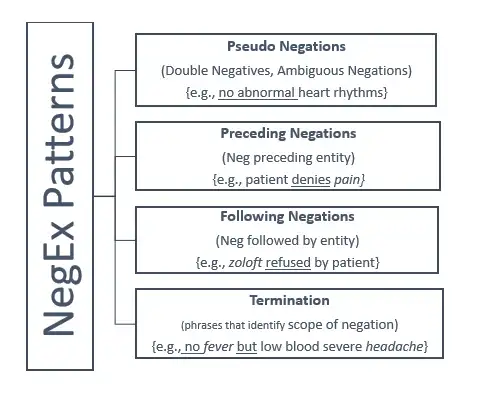

In [ ]:
#function to add custom negation terms to the existing model
def neg_model2(nlp_model):
    nlp = spacy.load(nlp_model, disable = ['parser'])
    nlp.add_pipe('sentencizer')
    ts = termset("en_clinical")
    # customize the term list by adding more negation terms
    ts.add_patterns({'preceding_negations': ['abstain from','deny','refuse','neither','other than','except for','except','with the exception of',
                                        'excluding','lack of','contraindication','contraindicated','interfere with',
                                      'prohibit','prohibits'],
                'following_negations':['negative','deny','absent','is allowed','impossible','exclusionary','decline']})
        
    nlp.add_pipe("negex", config={"ent_types":["PROBLEM","TEST",'TREATMENT','CHEMICAL', 'DISEASE']}) 
    return nlp


#updated list of all the negative concepts from clinical note identified by negspacy
results1 = negation_handling("en_ner_bc5cdr_md", lem_clinical_note, neg_model2)
matcher = match(nlp1, results1,"NEG_ENTITY")

#doc1: new doc object with added custom concepts for "NEG_ENTITY label"
doc1 = overwrite_ent_lbl(matcher,doc)

#visualizing identified Named Entities in clinical input text 
displacy.render(doc, style='ent', options=options, jupyter=True)

##Limitation
The negex patterns in the model are not added considering the preprocessing step that involves lemmatization. Lemmatization is an important part of NLP processing. If not considered, we might end up creating a model that is too tight to the concepts.
for instance: the negex patterns include: “denies”, “denying” but not “deny”.
Therefore, if the negation concepts are added keeping lemmatization in mind then we might end up extracting a lot more concepts based on a lot less terminology.

##References
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5863758/
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4231086/
https://www.aclweb.org/anthology/W13-5635.pdf
*Patent Pending with PCCI for the workflow described in this article 2020

# References
Negation
* https://github.com/jenojp/negspacy
* https://medium.com/@MansiKukreja/clinical-text-negation-handling-using-negspacy-and-scispacy-233ce69ab2ac
* https://towardsdatascience.com/clinical-notes-the-negative-story-e1140dd275c7
* https://www.youtube.com/watch?v=IiD3YZkkCmE&t=2210s
(see 36:41 of the video)

Negex: how to add and delete custom negation terms
* https://pypi.org/project/negspacy/
